In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

In [8]:
data = pd.read_stata('matched.dta')

In [9]:
temp = ['l2avgtemp', 'l3avgtemp', 'lavgtemp',  'temp6t4',  'le1avgtemp', 'le2avgtemp', 
        'le3avgtemp', 'le3temp6t4', 'le2temp6t4',  'letemp6t4', 'ltemp6t4', 'l2temp6t4', 
        'l3temp6t4', 'avgtemp', 'yearaftertemp', 'gtemp', 'yeartemp', 'heat']

for col in temp:
    new_col = col + str(10)
    data[new_col] = data[col]/1000

    
weatherdaily =  ['avgtemp10', 'skycover', 'pressureavgsealevel', 'windspeed', 'precipitationwaterequiv', 'avgdewpt']
weatherdailyt = ['skycover', 'avgdewpt', 'pressureavgsealevel', 'windspeed', 'precipitationwaterequiv']
weathertemp =   ['press6t4', 'dew6t4', 'prcp6t4', 'wind6t4', 'skycover']
weather6t4 =    ['temp6t410', 'press6t4', 'dew6t4', 'prcp6t4', 'wind6t4', 'skycover' ]
heat =          ['heat10', 'press6t4', 'prcp6t4', 'wind6t4', 'skycover']
dailyheat =     ['dailyheat', 'skycover', 'pressureavgsealevel', 'windspeed', 'precipitationwaterequiv' ]
dummies =       ['dayofweek', 'nat_name', 'c_asy_type', 'year', 'cm', 'chair']
pollutants =    ['ozone', 'co', 'pm25']


In [10]:
dropped_data = data.copy()
# creating the clusting variables
dropped_data['year']  = dropped_data['date'].dt.year.astype(str)
dropped_data['month']  = dropped_data['date'].dt.month.astype(str)
dropped_data['week']  = dropped_data['date'].dt.isocalendar().week.astype(str)
dropped_data['dayofweek'] = dropped_data['date'].dt.weekday

# creating the clustering variables
dropped_data['ym'] = dropped_data['year'] + dropped_data['month']
dropped_data['cw'] = dropped_data['city'] + dropped_data['week']
dropped_data['cy'] = dropped_data['city'] + dropped_data['year']
dropped_data['cm'] = dropped_data['city'] + dropped_data['month']
dropped_data['yw'] = dropped_data['year'] + dropped_data['week']
dropped_data['cym'] = dropped_data['city'] + dropped_data['year'] + dropped_data['month']  
dropped_data['cymw'] = dropped_data['city'] + dropped_data['year'] + dropped_data['month'] + dropped_data['week']
dropped_data['jm'] = dropped_data['chair'].astype(str) + dropped_data['month']



In [11]:
# bys city week month year:egen meantemp=mean(temp6t4)

dropped_data['mean_temp'] = dropped_data.groupby(['cymw'])['temp6t4'].transform('mean')
dropped_data['deviations'] = dropped_data['temp6t4'] - dropped_data['mean_temp']

In [12]:
dropped_data = dropped_data.dropna(how = 'any', subset = weather6t4 + pollutants)
dropped_data.to_csv('regression_data.csv')

## Generating Summary Tables

In [21]:
sum_stat_columns = ['res', 'temp6t4', 'heat'] + weathertemp + pollutants
mean = dropped_data[sum_stat_columns].mean()
sd = dropped_data[sum_stat_columns].std()
new_index = ['Grant Indicator', 
            'Temperature ($^{\circ}$F)',
            'Heat Index ($^{\circ}$F)',
            'Air Pressure (pa)',
            'Dew point ($^{\circ}$F)',
            'Precipitation (mm)', 
            'Wind speed (km/h)',
            'Sky cover (percent)',
            'Ozone (ppm)',
            'CO (ppm)',
            'PM$_{2.5}$ ($\mu$ / $m^3$)']

In [22]:
sum_stat_table = pd.DataFrame({'Mean':mean.values, 'Standard Deviation':sd.values}, index = new_index)

In [23]:
sum_stat_table

,Mean,Standard Deviation
Grant Indicator,0.164261,0.370854
Temperature ($^{\circ}$F),57.370564,15.720450
Heat Index ($^{\circ}$F),57.776386,16.411543
Air Pressure (pa),29.692633,0.759302
Dew point ($^{\circ}$F),49.371086,17.202080
Precipitation (mm),0.002822,0.013569
Wind speed (km/h),4.556642,3.440875
Sky cover (percent),0.554441,0.275636
Ozone (ppm),0.021971,0.011932
CO (ppm),0.917596,0.496442


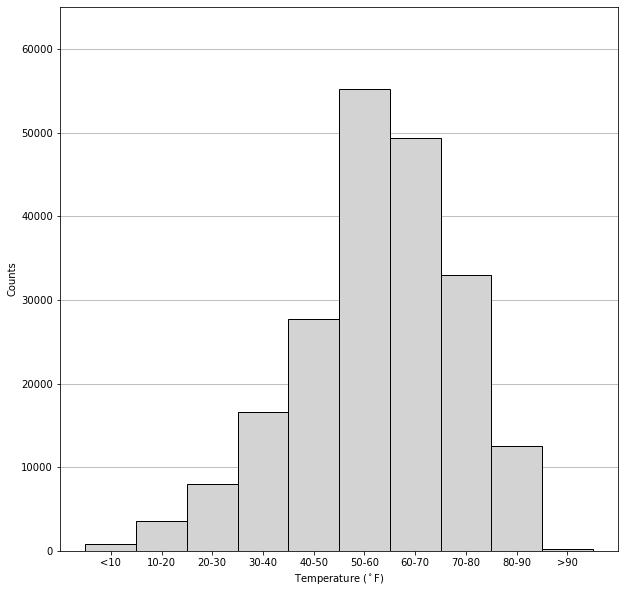

In [24]:
paper_fig3, ax = plt.subplots(figsize = (10,10))
ax.grid(axis = 'y', zorder=0)
ax.hist(dropped_data['temp6t4'], bins = np.arange(0,110,10), color = 'lightgrey', edgecolor = 'black', zorder=3)
ax.set_xlabel("Temperature ($^\circ$F)")
ax.set_xticks(np.arange(5,100,10))
ax.set_xticklabels(['<10'] + [str(i) + '-' + str(i+10) for i in range(10, 90, 10)] + ['>90'])
ax.set_ylabel("Counts")
ax.set_ylim([0, 65000]);
paper_fig3.savefig('paper_fig3.jpg')

In [66]:
cols = temp + weatherdaily + weatherdailyt + weathertemp + weather6t4 + heat + dailyheat + dummies + pollutants
relevant_data = dropped_data[cols]

In [69]:
nas2 = relevant_data.isna().sum(axis = 0)